In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('logistic regression dataset-Social_Network_Ads.csv')

In [3]:
data


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
x=data[["Age",'EstimatedSalary']]

In [9]:
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [10]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

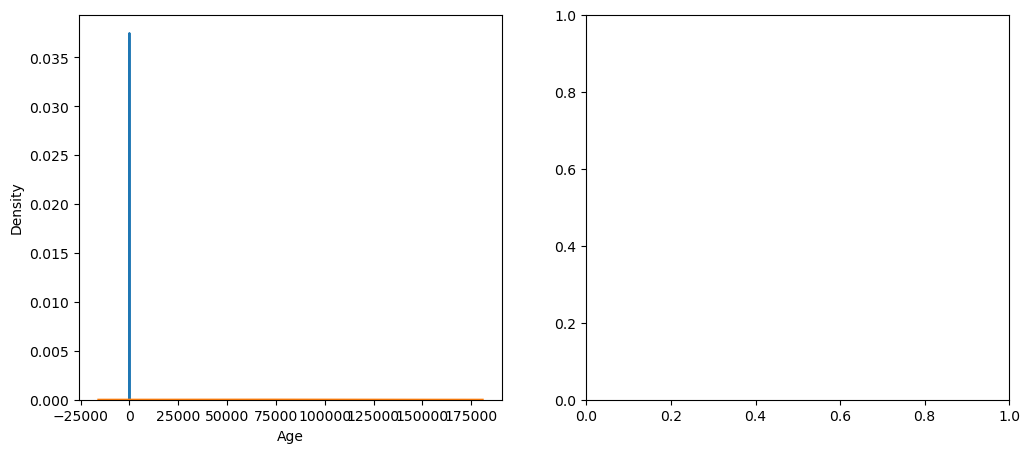

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(data["Age"],ax=ax1)
sns.kdeplot(data["EstimatedSalary"],ax=ax1)


 #because the mean value of age and estimated salary is  non relatable so we will standardize that with the help of standard scaler
 so that we can correlate between these two features

In [35]:
x=data[['Age','EstimatedSalary']]

In [36]:
y= data['Purchased']

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=50)

In [38]:
Sc=StandardScaler()

In [39]:
Sc.fit(xtrain)

StandardScaler()

In [40]:
Sc.mean_

array([3.8187500e+01, 6.9334375e+04])

In [41]:
xnewtrain=Sc.fit_transform(xtrain)
xnewtest =Sc.fit_transform(xtest)

In [42]:
xnewtrain=pd.DataFrame(xnewtrain,columns=xtrain.columns)

In [43]:
xnewtrain

,Age,EstimatedSalary
0,-1.336261,0.575529
1,0.076526,0.048746
2,-0.959518,0.429200
3,-0.959518,-0.302443
4,-0.771146,-1.590135
...,...,...
315,-0.771146,0.516997
316,-0.111846,0.253606
317,-0.017660,0.312137
318,0.735826,-0.829226


In [44]:
xnewtest=pd.DataFrame(xnewtest,columns = xtest.columns)

In [45]:
xnewtest

,Age,EstimatedSalary
0,-0.891221,0.734213
1,0.676910,-0.190076
2,-1.309389,0.316793
3,1.199620,-0.637312
4,-0.368511,0.436056
...,...,...
75,-1.204847,-0.488233
76,-1.204847,-0.398786
77,1.199620,-1.382706
78,0.049657,-0.637312


In [46]:
xnewtest["Age"].describe()

count    8.000000e+01
mean     1.332268e-16
std      1.006309e+00
min     -1.832099e+00
25%     -8.912208e-01
50%     -5.488457e-02
75%      6.769097e-01
max      2.558666e+00
Name: Age, dtype: float64

<Axes: title={'center': 'after'}, xlabel='Age', ylabel='Density'>

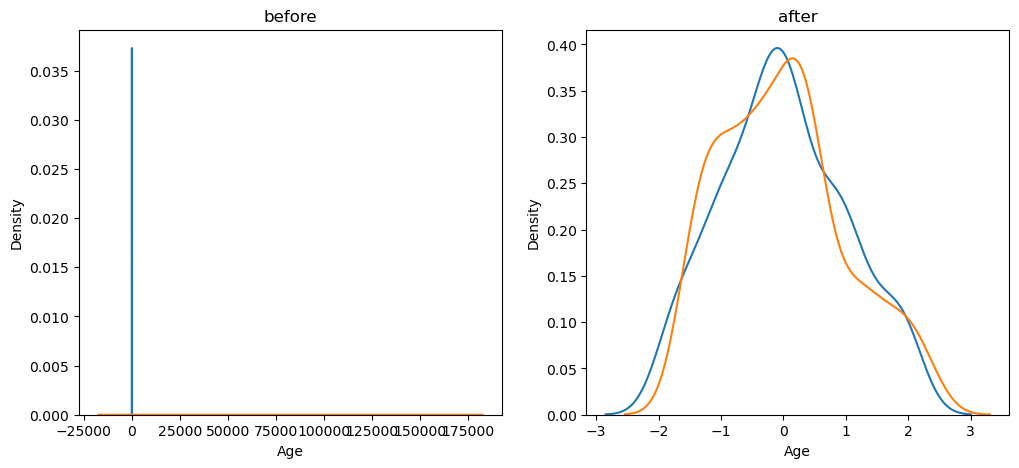

In [47]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("before")
sns.kdeplot(xtrain["Age"],ax=ax1)
sns.kdeplot(xtrain["EstimatedSalary"],ax=ax1)
ax2.set_title("after")
sns.kdeplot(xnewtrain["Age"],ax=ax2)
sns.kdeplot(xnewtrain["EstimatedSalary"],ax=ax2)